In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,772 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121753 files and dire

In [ ]:
plt.rc('font', family='NanumBarunGothic')

loc_path = '/content/loc.csv'
temp_path = '/content/temperature.csv'

loc_data = pd.read_csv(loc_path)
temp_data = pd.read_csv(temp_path)

In [ ]:
loc_data.head()

,Unnamed: 0,지점,지점명,지점주소,위도,경도
0,0,108,서울,종로구송월길 52서울기상관측소,37.5714,126.9658
1,1,110,김포공항,NaN,37.5569,126.7975
2,2,400,강남,강남구일원동 580탄천 물재생센터,37.4982,127.0816
3,3,401,서초,서초구서초동 1416번지서초 IC,37.4846,127.0260
4,4,402,강동,강동구고덕로 183서울종합직업전문학교,37.5556,127.1450


In [ ]:
temp_data.head()

,Unnamed: 0,지역명,지역 코드,년월일,최저기온(℃),최고기온(℃),일강수량(mm),최대순간풍속(m/s)
0,0,서울,108,2020-01-02,-0.7,3.8,0.0,6.7
1,1,서울,108,2020-01-03,-3.4,4.6,0.0,5.8
2,2,서울,108,2020-01-04,-2.8,6.1,0.0,8.5
3,3,서울,108,2020-01-05,-3.2,6.6,0.0,4.4
4,4,서울,108,2020-01-06,0.6,4.6,1.8,8.8


<ipython-input-7-cbca6998cc4c>:24: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


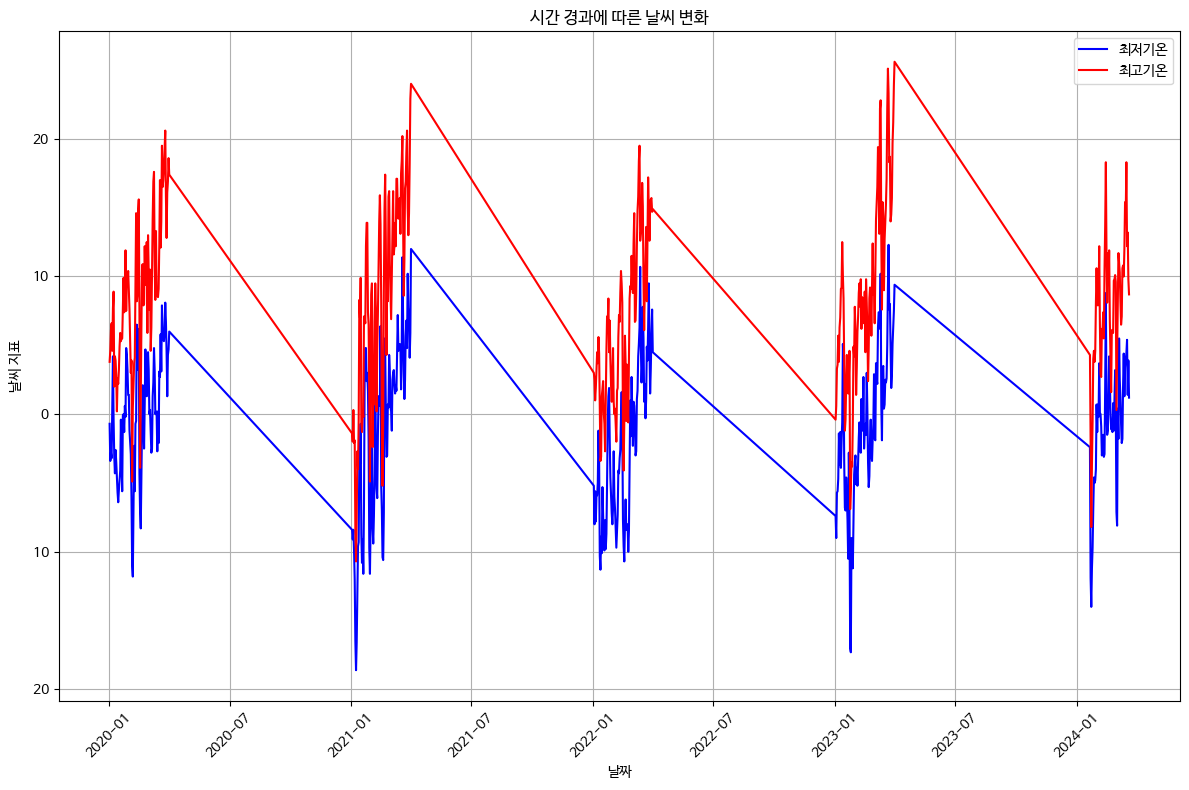

In [ ]:
# 시간별 날짜변화 시각화
data = temp_data

data['년월일'] = pd.to_datetime(data['년월일'])

data = data[data['지역명'] == '서울']

plt.figure(figsize=(12, 8))

plt.plot(data['년월일'], data['최저기온(℃)'], label='최저기온', color='blue')
plt.plot(data['년월일'], data['최고기온(℃)'], label='최고기온', color='red')
# plt.plot(data['년월일'], data['일강수량(mm)'], label='일강수량', color='green')
# plt.plot(data['년월일'], data['최대순간풍속(m/s)'], label='최대순간풍속', color='orange')

plt.title('시간 경과에 따른 날씨 변화')
plt.xlabel('날짜')
plt.ylabel('날씨 지표')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 지역 Data

data = loc_data

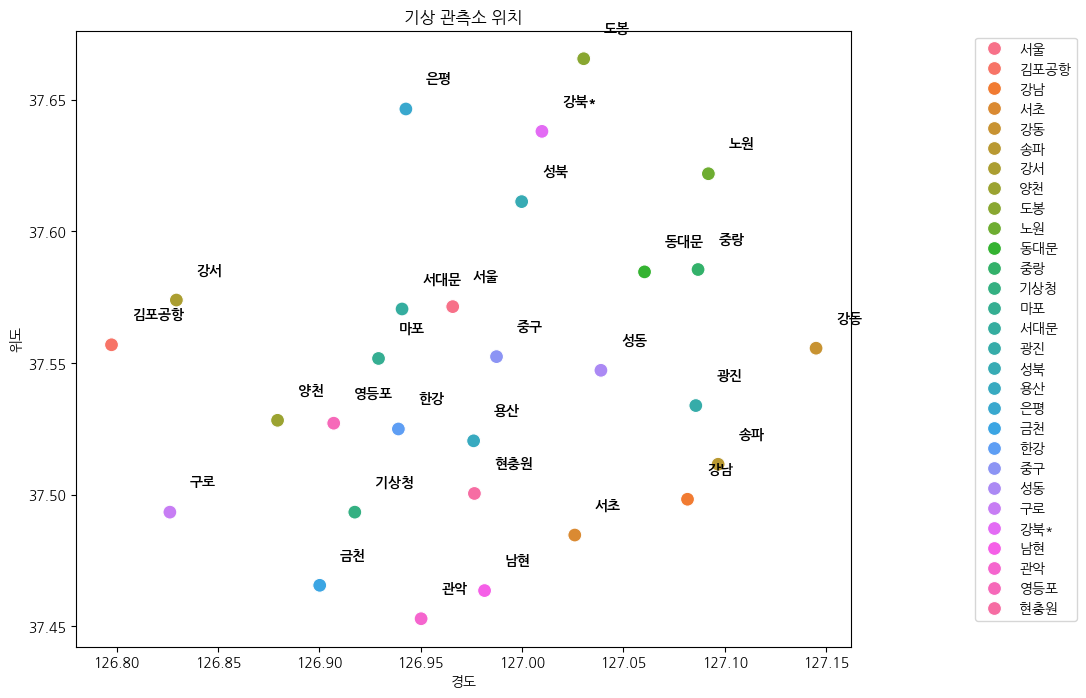

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

# 데이터 시각화 - scatter plot
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=data, x='경도', y='위도', hue='지점명', s=100)

# 각 점 옆에 텍스트 추가
for i in range(len(data)):
    scatter.text(data['경도'][i]+0.01, data['위도'][i]+0.01, data['지점명'][i], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('기상 관측소 위치')
plt.xlabel('경도')
plt.ylabel('위도')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()
